In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
dataPath = '/Users/zhengj10/Desktop/summary'

In [20]:
dataFile = dataPath+'/Summary_VC_all_Nov_combo.pkl'

In [21]:
df = pd.read_pickle(dataFile)

In [24]:
df_sel = df[df['Objective']=='40x oil GENIE']
df_sel.Mutation.unique()

array(['421.2096', '421.1', '558.1', '376.20949', '376.20950',
       '376.20948', 'L2', '476.4495', '533.1', '485.20950', '485.6',
       '487.6', '488.6', '558.2'], dtype=object)

In [23]:
df.Objective.unique()

array(['40x air', '40x oil core', '40x oil GENIE'], dtype=object)

In [25]:
labels_dict = {
    # Voltron and Voltron 2
    '421.1':'Voltron',
    '421.2096':'Voltron 2',
    '476.4495': 'Voltron 2-ST',
    
    # Voltron Combo mutants
    '421.4909':'Voltron N69E R78H A122D V196P',
    '421.4919':'Voltron R78H A122D V196P',
    '421.4876':'Voltron N69E A122D',
    '421.4892':'Voltron N69E V196P',
    '421.6051':'Voltron R78H L89C A122D V196P',
    '421.5649':'Voltron Y63L N69E L89C A122D',
    '421.6052':'Voltron Y63L L89C A122D V196P',
    '421.5658':'Voltron Y63L L89C A122D',
    '421.4951':'Voltron Y63L V74W L89T',
    '421.5657':'Voltron R78H L89C A122D',
    '421.5659':'Voltron L89C A122D',
    '421.5650':'Voltron N69E L89C A122D',
    '421.5657':'Voltron R78H L89C A122D',
    '421.5616':'Voltron V74E L89C',
    '421.5619':'Voltron Y63L L89C',
    '421.5658':'Voltron Y63L L89C A122D',
    '421.5649':'Voltron Y63L N69E L89C A122D',
    '421.5462':'Voltron N69E R78H N81S L89C A122D',
    '421.5951':'Voltron R78H N81S L89C A122D',
    '421.6051':'Voltron R78H L89C A122D V196P',
    '421.5922':'Voltron Y63L A122D V196P',
    '421.6052':'Voltron Y63L L89C A122D V196P',
    '421.6004':'Voltron Y63L N69E N81S',
    '421.6155':'Voltron Y63L L89T A122D V196P',
    '421.5952':'Voltron Y63L N81S L89C A122D',
    '421.5444':'Voltron Y63L R78H A122D V196P',
    '421.5953':'Voltron V74W R78H N81S L89C A122D',
    '421.6232':'Voltron Y63L V74E N81S',
    '421.5076':'Voltron Y63L N69E R78H N81S L89C',
    '421.5740':'Voltron V74E R78H N81S V196P',
    '421.4911':'Voltron N69E A122D V196P',
    '421.5152':'Voltron N69E V74W R78H N81S L89C A122H V196P',
    '421.5387':'Voltron V74E R78H L89C V196P',
    '421.5414':'Voltron V74W R78H L89C A122H V196P',
    '421.5448':'Voltron R78H A122H V196P',
    '421.5617':'Voltron Y63L R78H L89C',
    '421.5751':'Voltron N69E R78H N81S A122D V196P',
    '421.4850':'Voltron N69E R78H',
    '421.4875':'Voltron Y63L N69E R78H A122D',
    '421.4882':'Voltron R78H A122D',
    '421.4910':'Voltron Y63L N69E A122D V196P',
    '421.5760':'Voltron R78H N81S A122D V196P',
    '421.6053':'Voltron L89C A122D V196P',
    '421.6038':'Voltron Y63L N69E R78H L89C A122D V196P',
    
    # Voltron Single mutants
    '421.2907':'Voltron (A122X)',
    '421.2335':'Voltron (Y63P)',
    '421.2336':'Voltron (Y63T)',
    '421.2346':'Voltron (Y63I)',
    '421.3002':'Voltron (V74D)',
    '421.3046':'Voltron (V74S)',
    '421.3028':'Voltron (V74W)',
    '421.303':'Voltron (Y146X)',
    '421.3012':'Voltron (V74G)',
    '421.2379':'Voltron (Y63K)',
    '421.2347':'Voltron (Y63D)',
    '421.3067':'Voltron (V74H)',
    '421.2203':'Voltron (R78N)',
    '421.3006':'Voltron (V74P)',
    '421.1069':'Voltron (N69E)',
    '421.1076':'Voltron (N69P)',
    '421.3054':'Voltron (N74E)',
    '421.3167':'Voltron (L89T)',

    # ASAP1 variants
    '376.1':'ASAP1',
    '376.13':'ASAP1 (T392V)',
    
    # ASAP3b variants
    '414.1':'GS-ASAP3b',
    '376.20950':'ASAP3b (T392V)',
    '376.20949':'ASAP3b (T392Y)',
    '485.20950':'ASAP3b (T392V)-ST',
    '376.20948':'ASAP3b',
    '485.20949':'ASAP3b (T392Y)-ST',
    '485.6':'ASAP3b-ST',
    '376.17995':'ASAP3b N391L T392I',
    '376.18153':'ASAP3b N391I T392V',
    '533.1':'ASAP3b-Kv',
    
    # Amy's Feb batch of ASAP3b variants
    'ASAP3b.T392V.H':'pCAG0–ASAP3b (T392V)-NL-SOM2 (Lin)',
    'ASAP3b.T392V.G':'pCAG0–ASAP3b (T392V)-lTlcnC',
    'ASAP3b.T392V.F':'pCAG0–ASAP3b (T392V)-NL-SOM2 (GENIE)',
    'ASAP3b.T392V.I':'pCAG0–ASAP3b (T392V)-GSS3-SOM2-lTlcnC',
    'ASAP3b.T392V.J':'376.2095 / pCAG-ASAP3b (T392V)',
    'ASAP3b.T392V.C':'pCAG0–ASAP3b (T392V)-GSSlong-SOM2 (GENIE)',
    'ASAP3b.T392V.B':'pCAG0–ASAP3b (T392V)-KGC-GSS3-ER2-GSS3-SOM2 (GENIE)',
    'ASAP3b.T392V.A':'pCAG0–ASAP3b (T392V)-GSS3TR-SOM2 (GENIE)',
    'ASAP3b.T392V.E':'485.2095 / pCAG–ASAP3b (T392V)-TS-ER-SOM2',
    'ASAP3b.T392V.D':'533.1 / pCAG-ASAP3-Kv (Lin)',    
    
    # Amy's Jul batch of ASAP3b variants
    'N4':'ASAP3b (T392V)-TS-ER-SOM2 miniprep',
    'O5':'ASAP3b (T392V)-GSSlong-SOM2 (GENIE)',
    'M3':'ASAP3b (T392V)-NL-SOM2 (GENIE)',
    'L2':'ASAP3b (T392V)-GSS3-SOM2-lTlcnC',
    'Q7':'ASAP3b (T392V)-GSS3TR-SOM2 (GENIE)',
    'P6':'ASAP3b (T392V) maxiprep',
    'S9':'ASAP3b (T392V)-NL-SOM2 (Lin)',
    'T10':'pCAG-ASAP3b (T392V)-lTlcnC',
    'R8':'ASAP3b-TS-ER-SOM2 maxiprep',
    'W13':'ASAP3b (T392V) miniprep',
    'X14':'ASAP3-Kv (Lin) maxiprep',
    'Y15':'ASAP3b-TS-ER-SOM2 miniprep',
    'U11':'ASAP3-Kv (Lin) miniprep',
    'V12':'ASAP3b (T392V)-KGC-GSS3-ER2-GSS3-SOM2 (GENIE)',
    'K1':'ASAP3b (T392V)-TS-ER-SOM2 maxiprep',
    
    # Other Ace2N based sensors
    '487.1':'Ace2N-4AA-mNeon',
    '557.1':'CMV-VARNAM',
    '558.1':'CAG-VARNAM',
    '487.6':'Ace2N-4AA-mNeon A122D',
    '488.6':'Ace2N-4AA-mNeon A122D-ST',
    '558.2':'CAG-VARNAM A122D',
    '557.2':'CMV-VARNAM A122D'
}


In [30]:
df_p = df

/Users/zhengj10/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/zhengj10/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/zhengj10/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:216: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/zhengj10/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:185: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/Users/zhengj10/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


ValueError: 'x' and 'y' must have the same size

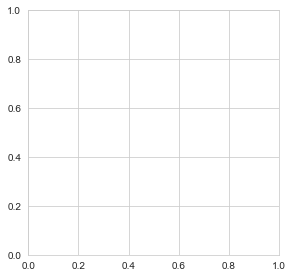

In [38]:
import unicodedata
import seaborn as sns

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42



fig = plt.figure(figsize=[4.5,4.5])
sns.set_style('whitegrid')

sensors = ['376.20948','376.20949','376.20950','L2','533.1','485.20950','485.6']

# n = len(sensors)
# colors = plt.cm.tab20(np.linspace(0,1,n))
# c = 0

colors = {1:'#1f77b4', 2:'#ff7f0e', 3:'#2ca02c', 4:'#d62728'}
x = np.linspace(-110,50,9)
i = 1
j = 1
ax = plt.subplot(111)
for sensor in sensors:
    df_sensor = df_p[(df_p.Mutation==sensor)&(df_p.Objective=='40x air')]
    


    param_mean = np.mean(df_sensor.dFF.to_list(),axis=0)
    param_sem = np.std(df_sensor.dFF.to_list(),axis=0)/np.sqrt(len(df_sensor))
    ax.errorbar(x, param_mean, yerr = param_sem,
                label = labels_dict[sensor] +' (%d)' %len(df_sensor))
    
        

    
# Following block remove the errorbars from legend
handles, labels = ax.get_legend_handles_labels() 
handles = [h[0] for h in handles]
ax.legend(handles, labels, frameon=False)
# ax.legend(handles, labels, frameon=False)


ax.set_xlabel('mV',size=14)
ax.set_ylabel('\u0394F/F',size=14)
plt.setp(ax, xticks=x)
plt.tight_layout()
# fig.savefig('/Users/zhengj10/Desktop/GENIE/Meeting/GENIE post pipeline/201209/Combo_mutations_40x_air.pdf',format='pdf')
# fig.savefig('/Users/zhengj10/Desktop/VARNAM_original_dFF.pdf',format='pdf')
# fig.savefig('/Users/zhengj10/Desktop/210303/VARNAM_F-V.png')
plt.show()


In [39]:
# df_p.columns
y

NameError: name 'y' is not defined

In [33]:
df_p.dFF

582    [0.1296836336316723, 0.041691808417944766, -0....
584    [0.15369317707754693, 0.0474363653831064, -0.0...
585    [0.1328735119190738, 0.04406510250552408, -0.0...
586    [0.1256286579046239, 0.04154493097667209, -0.0...
587    [0.10683299292964314, 0.035037357644358544, -0...
                             ...                        
697    [0.004208819231560889, 0.002447035456243152, 0...
698    [0.009299627857505063, 0.004170654220129172, -...
699    [0.009252802025178232, 0.0039573083189082476, ...
700    [0.006211430957285387, 0.003048124784515783, -...
701    [0.008551262145411546, 0.00498095847052458, -0...
Name: dFF, Length: 99, dtype: object

In [40]:
param_mean

nan

In [41]:
df_p

,Date,Plate,Well,Cell,Mutation,Transfected_date,Leak,Ra,dFF,F0,...,tau_on_f_double,tau_off_f_double,tau_on_s_double,tau_off_s_double,time_on_10-90,time_off_10-90,Leak_min,Ra_max,peak_dFF,Objective
582,2020.08.26_000,plate_001,well_1,patch_attempt_0016_000,421.2096,200818,"[6.338783519327587, 3.3269159410092035, -12.54...","[8.335904609424452, 8.572441133585704, 8.52998...","[0.1296836336316723, 0.041691808417944766, -0....","[347.80782310863935, 344.38365448062825, 343.6...",...,"[1.808401740436421, 4.560457409854135, 2.91549...","[3.9926266319415733, 4.205338993499002, 4.3804...","[6.175225711954252, 4.45111258877185, 4.652175...","[68.59798479800237, 4.773816218630346, 51851.2...","[10.525569866314981, 9.966603703800274, 7.1704...","[9.9870891287203, 9.456598316499367, 9.6407054...",-40.571002,12.266900,N/A,40x oil GENIE
584,2020.08.26_000,plate_001,well_1,patch_attempt_0015_000,421.2096,200818,"[-37.626167952756276, -33.49598916507703, -49....","[8.027108778954656, 8.23844695362197, 7.893359...","[0.15369317707754693, 0.0474363653831064, -0.0...","[204.13059080894476, 202.52748481092047, 197.7...",...,"[1.0951676165356197, 1.647254197595593, 3.3375...","[2.8335486889048735, 2.5543949025495905, 2.196...","[6.314832039578825, 6.739108926048667, 37.8148...","[18.29300445811827, 2.6870566041595545, 1882.1...","[10.515584523021005, 10.987228908961015, 11.68...","[8.75649705445494, 5.6681287507421985, 5.35566...",-118.850550,12.237603,N/A,40x oil GENIE
585,2020.08.26_000,plate_001,well_1,patch_attempt_0014_000,421.2096,200818,"[-53.97768749122584, -28.13308913907455, -27.5...","[15.634840838024767, 16.060545816112924, 14.94...","[0.1328735119190738, 0.04406510250552408, -0.0...","[250.823964967499, 245.86266680056335, 244.805...",...,"[4.902266697086581, 1.6065907937923063, 0.6299...","[3.5407237951697943, 5.247880947879906, 5.9234...","[56179.76493928688, 7.387643503212966, 7.87346...","[24.34917602343717, 5.98831687421407, 57680.70...","[15.741202665906428, 11.577119820206235, 12.14...","[10.414590566225115, 11.837216883629708, 13.03...",-54.379893,17.183038,N/A,40x oil GENIE
586,2020.08.26_000,plate_001,well_1,patch_attempt_0013_000,421.2096,200818,"[3.166742578604758, -0.5952316559096488, -7.35...","[10.90760227951715, 9.746968289589972, 12.5901...","[0.1256286579046239, 0.04154493097667209, -0.0...","[214.02143867634453, 211.0803706255515, 210.54...",...,"[3.115403617551109, 3.1338776583335672, 2.7049...","[3.7411075804579497, 3.2093668294987094, 3.260...","[21.30703701017406, 11.013635756859866, 23.591...","[54.40168091122495, 3.522139656923603, 66260.6...","[10.26488722576147, 11.412864539742941, 9.5272...","[9.849552354927937, 7.171770852597092, 7.17734...",-20.243998,16.152583,N/A,40x oil GENIE
587,2020.08.26_000,plate_001,well_1,patch_attempt_0012_000,421.2096,200818,"[7.06842521583904, -1.5570762452127598, -0.842...","[13.335786629474894, 12.78246942485027, 13.667...","[0.10683299292964314, 0.035037357644358544, -0...","[202.88498625857468, 203.06751579476688, 200.9...",...,"[0.5531897860671204, 1.0953624089387315, 3.853...","[1.7449993160990462, 3.6022498368078484, 3.472...","[4.692417582415811, 10.934027427204759, 297.27...","[5.59436305297215, 3.687416583998004, 1151.238...","[9.500260026227465, 18.41061782973867, 11.1687...","[8.247885652168407, 7.929610975054857, 8.81152...",-40.947424,13.726470,N/A,40x oil GENIE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,2020.10.28_001-varnam,plate_002,well_1,patch_attempt_0032_000,558.1,201020,"[-25.20637164794756, -30.012874129151477, -44....","[7.985028475019366, 7.818388577771687, 7.55842...","[0.004208819231560889, 0.002447035456243152, 0...","[245.26024421012883, 239.77437673247695, 235.8...",...,"[0.0746472168924274, 27.47551395192625, 35.724...","[186.19253271637544, 246.80337306763678, 56.34...","[129.8177892753783, 498.7222455523758, 208.327...","[233.3133346673759, 446.08794253403624, 5753.6...","[257.68297786440854, 376